# I choosed "Boston House Prices Prediction" project


In [21]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
# Initializing the dataframe
data = pd.DataFrame(boston.data)

C:\Users\Komal Khan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [23]:
# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**CRIM** per capita crime rate by town\
**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.\
**INDUS** proportion of non-retail business acres per town\
**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\
**NOX** nitric oxides concentration (parts per 10 million)\
**RM** average number of rooms per dwelling\
**AGE** proportion of owner-occupied units built prior to 1940\
**DIS** weighted distances to five Boston employment centres\
**RAD** index of accessibility to radial highways\
**TAX** full-value property-tax rate per 10,000usd\
**PTRATIO** pupil-teacher ratio by town\
**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
**LSTAT** % lower status of the population\

Each record in the database describes a Boston suburb or town.

In [25]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [26]:
#Check the shape of dataframe
data.shape

(506, 14)

In [27]:
#Check the columns of dataframe
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [28]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [29]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [30]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [31]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [32]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [34]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=False)

In [35]:
# model and prediction
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#Train the model using the training sets
model.fit(X,y)

# Predict Output
predicted= model.predict(X_test) # weight:70, gender:1, Male

In [36]:
# Value of y intercept
model.intercept_

36.459488385089855

In [37]:
np.array([X_train.columns,model.coef_]).T.tolist()

[['CRIM', -0.10801135783679722],
 ['ZN', 0.04642045836688097],
 ['INDUS', 0.02055862636707054],
 ['CHAS', 2.68673381934497],
 ['NOX', -17.76661122830039],
 ['RM', 3.8098652068092376],
 ['AGE', 0.0006922246403448813],
 ['DIS', -1.475566845600256],
 ['RAD', 0.3060494789851748],
 ['TAX', -0.012334593916574446],
 ['PTRATIO', -0.9527472317072886],
 ['B', 0.009311683273793833],
 ['LSTAT', -0.5247583778554863]]

In [38]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, predicted))
print('MAE:',metrics.mean_absolute_error(y_test, predicted))
print('MSE:',metrics.mean_squared_error(y_test, predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R^2: 0.4320122918607666
MAE: 4.182435571091756
MSE: 37.68386726478948
RMSE: 6.1387186989460165


$𝑅^2$ : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.\

**MAE** : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. \

**MSE**: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. \

**RMSE**: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. \

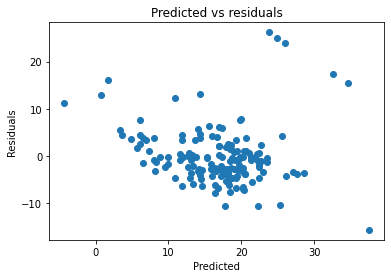

In [39]:
# Checking residuals
plt.scatter(predicted,y_test-predicted)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied